Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.
- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

Bonus
- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data.
- e) Write down the takeaways from this exercise.




In [64]:
import pandas as pd
import numpy as np
import wrangle
import os
import acq
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pydataset import data

In [32]:
# acquire the dataset from pydataset

df = data('iris')

In [33]:
# get dataset information using summarize function from wrangle
wrangle.summarize(df)

DataFrame head: 

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa
----------
DataFrame info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
----------
DataFrame description: 

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    15

### Initial Takeaways:

- Five columns and 150 rows
- Three species types, four measurements
- 150 non-null observations

In [34]:
# rename columns to all lowercase and underscores instead of periods
# this could have been done in a for loop (do that next time)

df = df.rename(columns={'Petal.Width':'petal_width', 'Sepal.Width':'sepal_width', 'Petal.Length':'petal_length', 
                      'Sepal.Length':'sepal_length', 'Species':'species'})

In [35]:
# choose two features to work with
X = df[['petal_width', 'sepal_width']]

In [36]:
# initiate KMeans test with 3 clusters
kmeans = KMeans(n_clusters=3)
# fit the model to selected features
kmeans.fit(X)
# make predictions on selected features
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [37]:
# create a new column for the predictions

df['cluster'] = kmeans.predict(X)

In [38]:
# make sure the column was created correctly

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [39]:
# split the data using the split_data function in wrangle
train, validate, test = wrangle.split_data(df)

In [40]:
# confirm proper splitting
train.shape, validate.shape, test.shape

((90, 6), (30, 6), (30, 6))

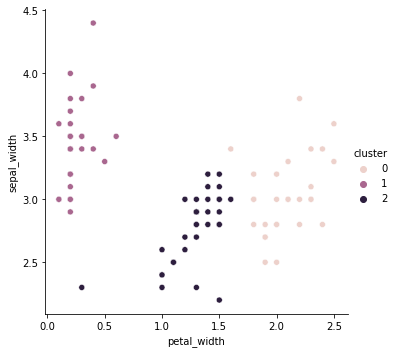

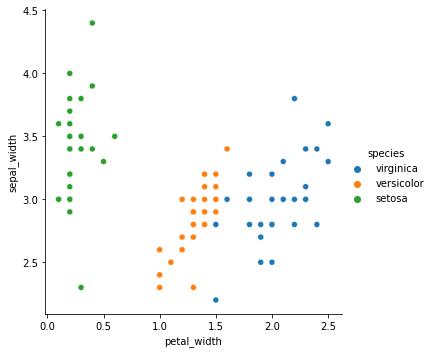

In [42]:
# data visualizations for selected features

sns.relplot(x='petal_width', y='sepal_width', hue='cluster', data=train)
sns.relplot(x='petal_width', y='sepal_width', hue='species', data=train)

In [43]:
# method for getting centroids
kmeans.cluster_centers_

array([[2.05208333, 3.04166667],
       [0.24489796, 3.45102041],
       [1.30943396, 2.70754717]])

In [44]:
# save centroid values to a dataframe
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


In [45]:
# view cluster centers for selected features as a dataframe
df.groupby('cluster')['petal_width', 'sepal_width'].mean()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_5483/902265308.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['petal_width', 'sepal_width'].mean()


,petal_width,sepal_width
cluster,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


Text(0.5, 1.0, 'Visualizing Cluster Centers')

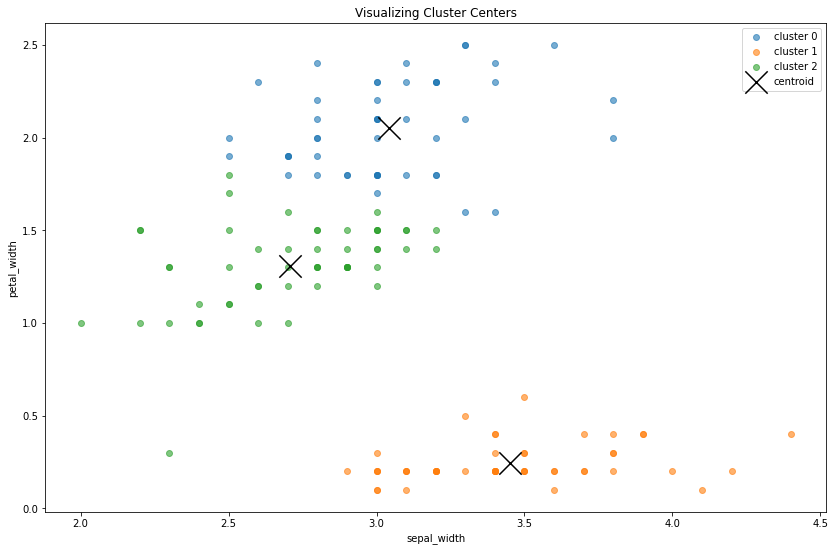

In [46]:
# plot the data with selected features and centroids

plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=500, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')


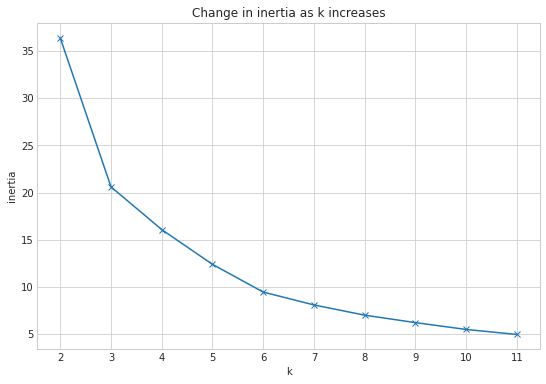

In [47]:
# plot inertia for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


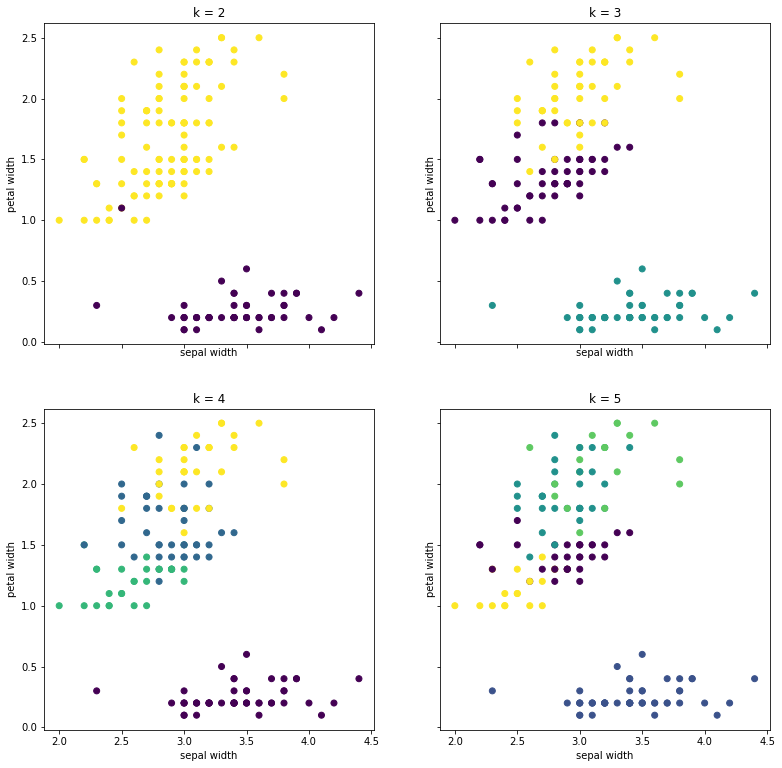

In [63]:
# plot each result for k in range
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

In [50]:
# select new features
X = df[['petal_width', 'sepal_width', 'petal_length']]

In [51]:
# initiate the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)
# fit the model on the selected features
kmeans.fit(X)
# calculate predictions for selected features
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [53]:
# create a new column for predictions
df['cluster'] = kmeans.predict(X)

In [55]:
# split the data
train, validate, test = wrangle.split_data(df)

In [56]:
# view the cluster centers array
kmeans.cluster_centers_

array([[1.3509434 , 2.75471698, 4.28113208],
       [0.246     , 3.428     , 1.462     ],
       [2.04255319, 3.00425532, 5.6106383 ]])

In [57]:
# assign cluster centers to variable centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width,petal_length
0,1.350943,2.754717,4.281132
1,0.246000,3.428000,1.462000
2,2.042553,3.004255,5.610638


In [58]:
# view the cluster means as a dataframe
df.groupby('cluster')['petal_width', 'sepal_width', 'petal_length'].mean()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_5483/1370016564.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['petal_width', 'sepal_width', 'petal_length'].mean()


,petal_width,sepal_width,petal_length
cluster,,,
0,1.350943,2.754717,4.281132
1,0.246000,3.428000,1.462000
2,2.042553,3.004255,5.610638


Text(0.5, 1.0, 'Visualizing Cluster Centers')

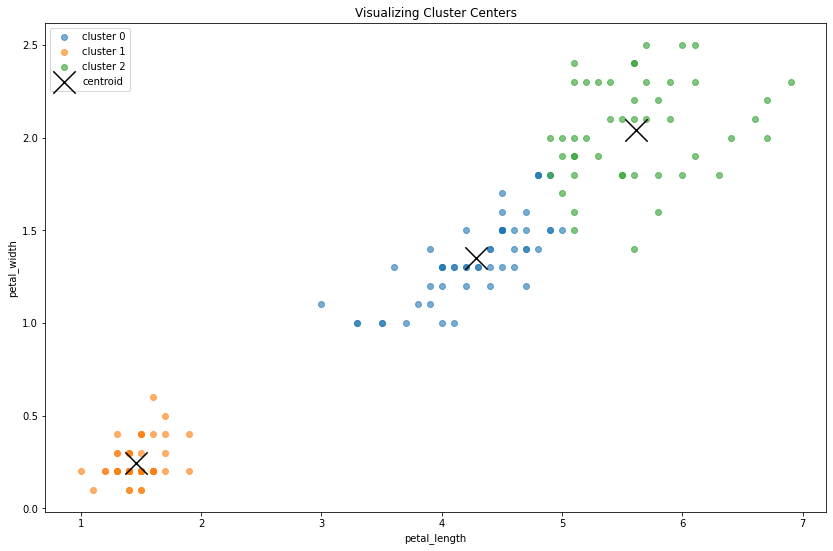

In [62]:
# plot the clusters with the new features
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.petal_length, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='petal_length', c='black', marker='x', s=500, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')


In [65]:
# acquire the mallcustomer dataset from function in acq.py
mall = acq.get_mallcustomer_data()

In [66]:
# verify acquisition
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [71]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>, <AxesSubplot:>]],
      dtype=object)

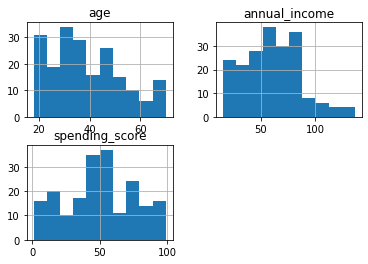

In [68]:
mall.hist()

In [72]:
X = mall[['age', 'annual_income']]

In [87]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 1, 4, 4, 4,
       0, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [88]:
mall['cluster'] = kmeans.predict(X)

In [89]:
train, validate, test = wrangle.split_data(mall)

In [90]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,25.064516,59.483871
1,56.490196,49.803922
2,30.214286,27.071429
3,36.600000,109.700000
4,37.696429,78.517857


In [91]:
train.groupby('cluster')['age', 'annual_income'].mean()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_5483/3394001568.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('cluster')['age', 'annual_income'].mean()


,age,annual_income
cluster,,
0,24.500000,60.437500
1,58.156250,51.281250
2,29.760000,26.880000
3,38.444444,103.555556
4,37.736842,79.473684


Text(0.5, 1.0, 'Visualizing Cluster Centers')

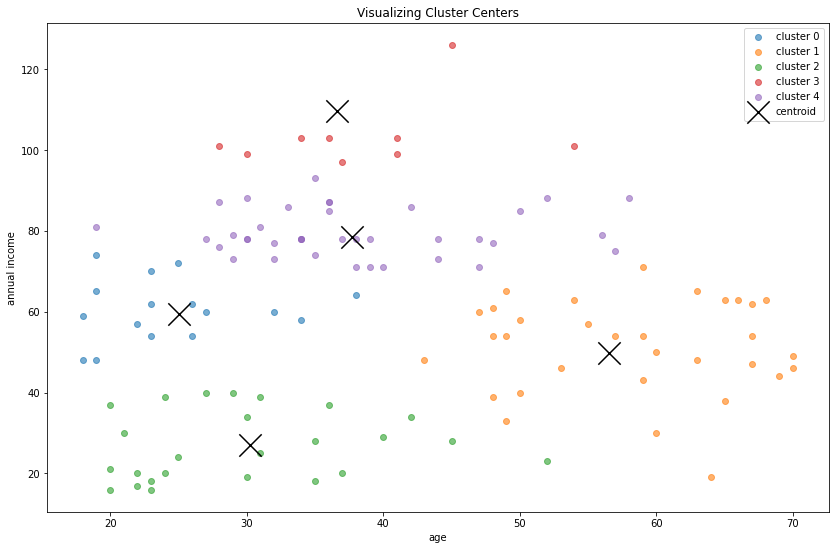

In [92]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=500, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual income')
plt.title('Visualizing Cluster Centers')


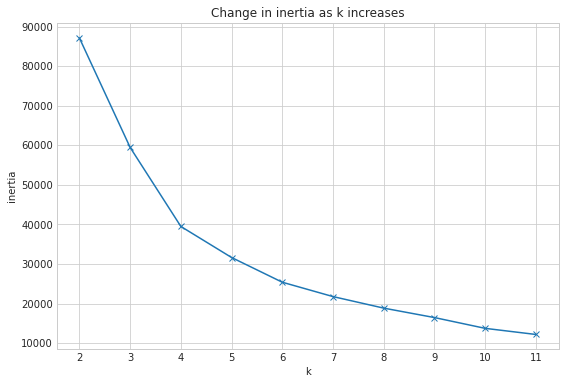

In [93]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


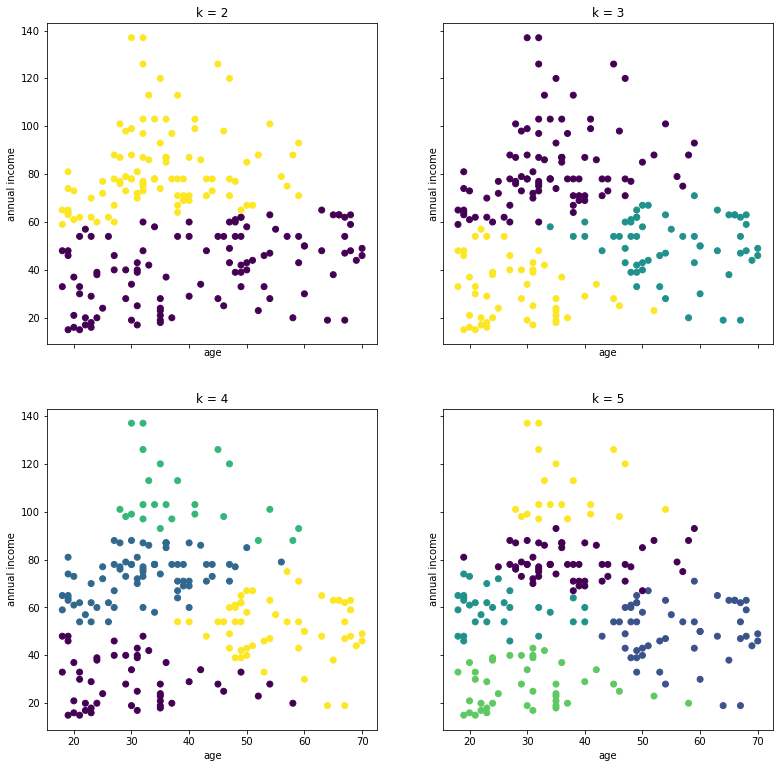

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual income')